# **Fronteira Eficiente com Simulação de Monte Carlo**

# 1. Instalando e importando as bibliotecas

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Selecionar ativos da carteira

In [ ]:
ativos = ['ABEV3.SA', 'AAPL34.SA','EQTL3.SA', 'LREN3.SA',
          'CIEL3.SA', 'RADL3.SA', 'RENT3.SA', 'MDIA3.SA',
          'WEGE3.SA', 'EZTC3.SA', 'FLRY3.SA','BOVA11.SA', 'TSLA34.SA']

In [ ]:
inicio = '2016-01-01'
fim = '2022-05-15'

In [ ]:
df = yf.download(ativos, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  13 of 13 completed


# 3. Visualização dos preços

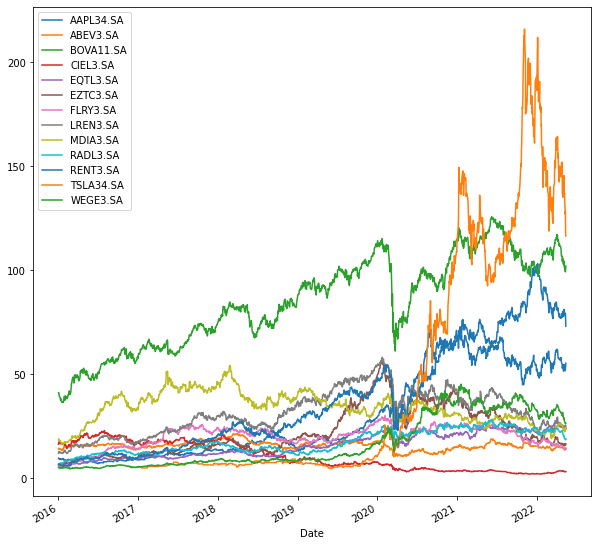

In [ ]:
df.plot(figsize = (10,10))

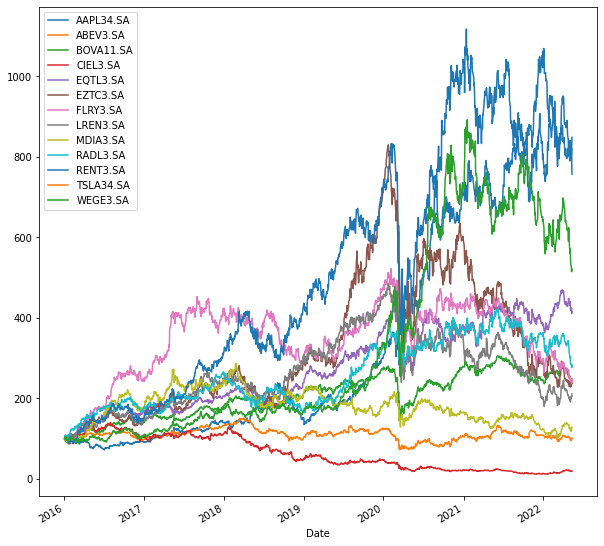

In [ ]:
((df/df.iloc[0])*100).plot(figsize = (10,10))

In [ ]:
df.head()

,AAPL34.SA,ABEV3.SA,BOVA11.SA,CIEL3.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,LREN3.SA,MDIA3.SA,RADL3.SA,RENT3.SA,TSLA34.SA,WEGE3.SA
Date,,,,,,,,,,,,,
2016-01-04,9.655293,14.220701,41.099998,16.320023,5.728097,6.830275,5.758893,11.973790,18.867485,6.671643,6.517810,NaN,5.069699
2016-01-05,9.655293,14.443802,41.180000,17.100302,6.005824,6.949409,5.826867,12.826409,18.391449,6.982834,6.679709,NaN,5.315566
2016-01-06,9.439609,14.303329,40.500000,17.363770,6.040540,6.835949,5.796657,12.752272,18.577217,7.047351,6.741119,NaN,5.194363
2016-01-07,9.005945,13.923231,39.470001,17.429638,5.873904,6.807583,5.804210,12.544675,18.028610,7.138430,6.699249,NaN,5.045460
2016-01-08,9.104609,14.105016,39.340000,17.733644,5.953750,6.977775,5.826867,12.515020,18.286949,7.081507,6.699249,NaN,5.021218


In [ ]:
df.tail()

,AAPL34.SA,ABEV3.SA,BOVA11.SA,CIEL3.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,LREN3.SA,MDIA3.SA,RADL3.SA,RENT3.SA,TSLA34.SA,WEGE3.SA
Date,,,,,,,,,,,,,
2022-05-06,79.389999,13.53,101.230003,3.085789,23.969999,15.590000,13.93,24.240000,22.610001,19.020000,52.080002,137.000000,27.150000
2022-05-09,78.000000,13.69,99.680000,3.056022,24.320000,15.820000,13.93,23.889999,22.350000,18.930000,51.709999,127.000000,26.660000
2022-05-10,79.360001,13.73,99.239998,3.085789,24.270000,16.340000,14.20,24.740000,22.910000,18.969999,52.549999,128.259995,26.120001
2022-05-11,75.379997,13.95,100.639999,3.060000,23.559999,16.129999,13.69,24.530001,23.480000,18.459999,53.930000,118.000000,26.100000
2022-05-12,73.099998,14.48,102.040001,3.180000,23.820000,16.410000,14.27,25.280001,24.260000,18.799999,55.310001,116.449997,26.410000


# 4. Calculando retornos diários e anuais dos papéis

In [ ]:
retorno_diario = df.pct_change()

In [ ]:
retorno_diario.head()

,AAPL34.SA,ABEV3.SA,BOVA11.SA,CIEL3.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,LREN3.SA,MDIA3.SA,RADL3.SA,RENT3.SA,TSLA34.SA,WEGE3.SA
Date,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.000000,0.015688,0.001947,0.047811,0.048485,0.017442,0.011803,0.071207,-0.025230,0.046644,0.024839,NaN,0.048497
2016-01-06,-0.022338,-0.009726,-0.016513,0.015407,0.005780,-0.016326,-0.005185,-0.005780,0.010101,0.009239,0.009194,NaN,-0.022802
2016-01-07,-0.045941,-0.026574,-0.025432,0.003793,-0.027586,-0.004150,0.001303,-0.016279,-0.029531,0.012924,-0.006211,NaN,-0.028666
2016-01-08,0.010955,0.013056,-0.003294,0.017442,0.013593,0.025000,0.003904,-0.002364,0.014329,-0.007974,0.000000,NaN,-0.004805


In [ ]:
retorno_diario = retorno_diario.iloc[1:]

In [ ]:
retorno_diario.head()

,AAPL34.SA,ABEV3.SA,BOVA11.SA,CIEL3.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,LREN3.SA,MDIA3.SA,RADL3.SA,RENT3.SA,TSLA34.SA,WEGE3.SA
Date,,,,,,,,,,,,,
2016-01-05,0.000000,0.015688,0.001947,0.047811,0.048485,0.017442,0.011803,0.071207,-0.025230,0.046644,0.024839,NaN,0.048497
2016-01-06,-0.022338,-0.009726,-0.016513,0.015407,0.005780,-0.016326,-0.005185,-0.005780,0.010101,0.009239,0.009194,NaN,-0.022802
2016-01-07,-0.045941,-0.026574,-0.025432,0.003793,-0.027586,-0.004150,0.001303,-0.016279,-0.029531,0.012924,-0.006211,NaN,-0.028666
2016-01-08,0.010955,0.013056,-0.003294,0.017442,0.013593,0.025000,0.003904,-0.002364,0.014329,-0.007974,0.000000,NaN,-0.004805
2016-01-11,0.002520,-0.015817,-0.015760,-0.047143,-0.001749,0.008130,-0.005833,-0.028436,-0.038095,-0.001340,0.001667,NaN,-0.022758


Anualizando os retornos

In [ ]:
retorno_anual = retorno_diario.mean()*250

In [ ]:
retorno_anual

AAPL34.SA    0.373025
ABEV3.SA     0.043779
BOVA11.SA    0.179312
CIEL3.SA    -0.144109
EQTL3.SA     0.263981
EZTC3.SA     0.247403
FLRY3.SA     0.199946
LREN3.SA     0.198589
MDIA3.SA     0.103555
RADL3.SA     0.212366
RENT3.SA     0.436612
TSLA34.SA    0.780788
WEGE3.SA     0.326191
dtype: float64

**Calculando a covariância**

In [ ]:
cov_diario = retorno_diario.cov()

In [ ]:
cov_diario

,AAPL34.SA,ABEV3.SA,BOVA11.SA,CIEL3.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,LREN3.SA,MDIA3.SA,RADL3.SA,RENT3.SA,TSLA34.SA,WEGE3.SA
AAPL34.SA,0.000425,0.000034,0.000038,0.000049,0.000022,0.000029,0.000016,0.000023,0.000020,0.000015,0.000033,0.000254,0.000054
ABEV3.SA,0.000034,0.000326,0.000172,0.000200,0.000128,0.000212,0.000135,0.000207,0.000160,0.000130,0.000196,0.000057,0.000160
BOVA11.SA,0.000038,0.000172,0.000281,0.000248,0.000178,0.000320,0.000183,0.000284,0.000185,0.000146,0.000311,0.000103,0.000210
CIEL3.SA,0.000049,0.000200,0.000248,0.000927,0.000199,0.000341,0.000193,0.000300,0.000224,0.000169,0.000328,0.000075,0.000208
EQTL3.SA,0.000022,0.000128,0.000178,0.000199,0.000308,0.000265,0.000164,0.000220,0.000138,0.000117,0.000231,0.000064,0.000154
EZTC3.SA,0.000029,0.000212,0.000320,0.000341,0.000265,0.000872,0.000275,0.000458,0.000285,0.000211,0.000469,0.000116,0.000263
FLRY3.SA,0.000016,0.000135,0.000183,0.000193,0.000164,0.000275,0.000450,0.000254,0.000163,0.000147,0.000268,0.000107,0.000167
LREN3.SA,0.000023,0.000207,0.000284,0.000300,0.000220,0.000458,0.000254,0.000640,0.000218,0.000197,0.000432,0.000101,0.000231
MDIA3.SA,0.000020,0.000160,0.000185,0.000224,0.000138,0.000285,0.000163,0.000218,0.000509,0.000132,0.000242,0.000091,0.000185
RADL3.SA,0.000015,0.000130,0.000146,0.000169,0.000117,0.000211,0.000147,0.000197,0.000132,0.000388,0.000210,0.000050,0.000182


In [ ]:
cov_anual = cov_diario*250

Calculando pesos dos ativos

In [ ]:
num_assets = len(ativos)

In [ ]:
num_assets

13

In [ ]:
peso = np.random.random(num_assets)

In [ ]:
peso

array([0.6308088 , 0.47026081, 0.26807247, 0.67380851, 0.64364974,
       0.96550299, 0.18272434, 0.15636332, 0.71014165, 0.01090692,
       0.84409374, 0.13702345, 0.925275  ])

In [ ]:
sum(peso)

6.618631739014479

In [ ]:
carteira = peso/sum(peso)

In [ ]:
sum(peso/sum(peso))

0.9999999999999999

In [ ]:
# Como calculamos os retornos segundo a MPT?

In [ ]:
np.dot(carteira, retorno_anual)

0.23213673381819494

In [ ]:
# Como calculamos a volatilidade segundo a MPT?

In [ ]:
np.sqrt(np.dot(carteira.T, (np.dot(cov_anual, carteira))))

0.2480546119796649

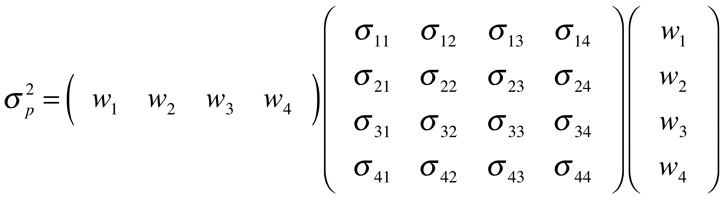

In [ ]:
from IPython.display import Image
Image('https://i.stack.imgur.com/U4B9I.png')

# 5. Iniciando simulação de Monte Carlo

Vamos utilizar uma simulação estocástica para criar 200 mil portfólio randomizados e dessa forma verificar a formação de uma fronteira eficiente

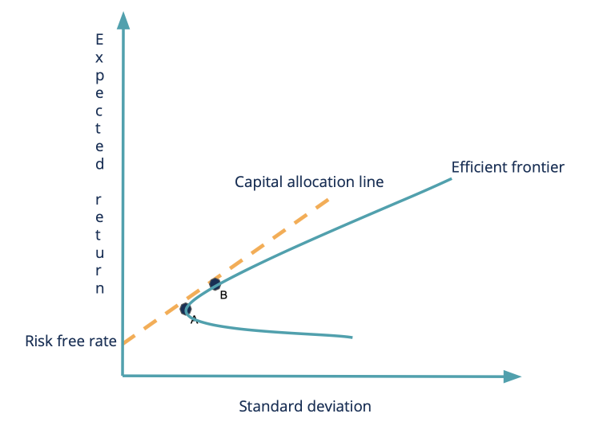

In [ ]:
from IPython.display import Image
Image('https://cdn.corporatefinanceinstitute.com/assets/modern-portfolio-theory1.jpeg.png')

In [ ]:
# Aqui vamos criar 200 mil portfólios fictícios com esses papéis

In [ ]:
port_returns = []

port_volatility = []

stock_weights = []

In [ ]:
# Vamos passar os parâmetros de simulação

In [ ]:
num_assets = len(ativos)

num_portfolios = 2000000

In [ ]:
# Vamos usar a função random para criar 13 pesos aleatórios

In [ ]:
peso = np.random.random(num_assets)

In [ ]:
peso /= np.sum(peso)

In [ ]:
peso

array([0.03808287, 0.03059822, 0.15373484, 0.07110042, 0.04564555,
       0.12319457, 0.13649857, 0.05026588, 0.07634295, 0.03515082,
       0.07055894, 0.04319325, 0.12563311])

In [ ]:
sum(peso)

1.0

In [ ]:
range(num_portfolios)

range(0, 2000000)

In [ ]:
for i in range(num_portfolios):

  # Criando pesos aleatórios para os papéis
  # Essa variável é completamente aleatória
  weights = np.random.random(num_assets)

  # Normalizando para que sejam 100%
  weights /= np.sum(weights)

  # Cálculo do retorno do portfólio
  returns = np.dot(weights, retorno_anual)

  # Cálculo da volatilidade para cada um dos portfólios
  volatility = np.sqrt(np.dot(weights.T, (np.dot(cov_anual, weights))))

  port_returns.append(returns)
  port_volatility.append(volatility)
  stock_weights.append(weights)

In [ ]:
portfolio = {'Retornos':  port_returns, 'Volatilidade': port_volatility}

In [ ]:
for i, papel in enumerate(ativos):
  portfolio[papel + ' peso'] = [weight[i] for weight in stock_weights]

  df = pd.DataFrame(portfolio)

In [ ]:
df.head()

,Retornos,Volatilidade,ABEV3.SA peso,AAPL34.SA peso,EQTL3.SA peso,LREN3.SA peso,CIEL3.SA peso,RADL3.SA peso,RENT3.SA peso,MDIA3.SA peso,WEGE3.SA peso,EZTC3.SA peso,FLRY3.SA peso,BOVA11.SA peso,TSLA34.SA peso
0,0.208315,0.215633,0.112241,0.140758,0.136029,0.028379,0.101258,0.049749,0.037827,0.130382,0.113158,0.092192,0.013105,0.034793,0.010130
1,0.209008,0.236253,0.116411,0.000494,0.113564,0.156951,0.025452,0.098626,0.000348,0.038094,0.082269,0.188841,0.062253,0.033424,0.083274
2,0.163950,0.265802,0.015776,0.055659,0.035520,0.166281,0.018062,0.123356,0.109285,0.138381,0.203867,0.007439,0.041744,0.044173,0.040456
3,0.282564,0.229206,0.114461,0.120377,0.052721,0.094144,0.064325,0.105128,0.005614,0.033707,0.041265,0.108441,0.021440,0.161647,0.076731
4,0.237367,0.250723,0.017912,0.042061,0.138067,0.168430,0.093403,0.023701,0.107226,0.008859,0.009784,0.074576,0.171880,0.078619,0.065481


In [ ]:
retornos = df.sort_values(by = ['Retornos'], ascending = False)

In [ ]:
retornos.head()

,Retornos,Volatilidade,ABEV3.SA peso,AAPL34.SA peso,EQTL3.SA peso,LREN3.SA peso,CIEL3.SA peso,RADL3.SA peso,RENT3.SA peso,MDIA3.SA peso,WEGE3.SA peso,EZTC3.SA peso,FLRY3.SA peso,BOVA11.SA peso,TSLA34.SA peso
870190,0.429159,0.291153,0.021478,0.010647,0.058162,0.012875,0.102677,0.197342,0.024908,0.017845,0.003596,0.042482,0.078933,0.316420,0.112635
1113195,0.424541,0.287419,0.006231,0.011721,0.139560,0.012619,0.038720,0.029244,0.132542,0.009255,0.066953,0.017457,0.190481,0.321797,0.023420
295948,0.421886,0.260735,0.083797,0.042286,0.028409,0.005033,0.145389,0.036572,0.025956,0.018193,0.014775,0.086216,0.213516,0.258038,0.041820
1757225,0.413500,0.262865,0.112344,0.060377,0.009553,0.035153,0.081533,0.029733,0.010288,0.030299,0.010854,0.015484,0.204525,0.244632,0.155225
273831,0.413285,0.248429,0.240022,0.043861,0.010591,0.003332,0.079834,0.097112,0.007235,0.025338,0.005403,0.028059,0.102891,0.222531,0.133792


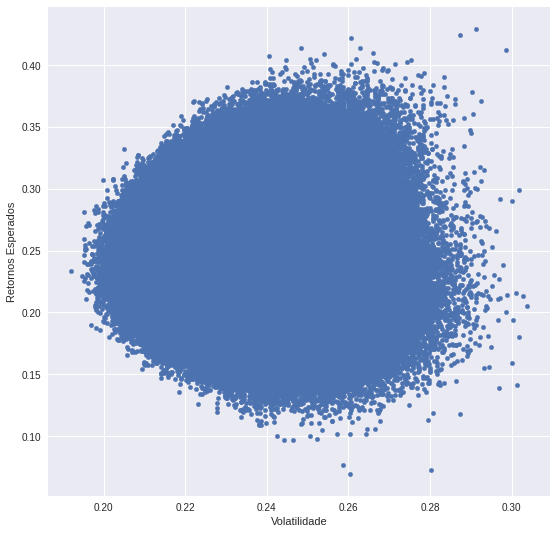

In [ ]:
plt.style.use('seaborn')

df.plot.scatter(x  = 'Volatilidade', y = 'Retornos', figsize = (9,9), grid = True)

plt.xlabel('Volatilidade')

plt.ylabel('Retornos Esperados')

#plt.title('Fronteira Eficiente')

plt.show()

Extraindo o melhor portfólio

In [ ]:
retorno_max = retornos.iloc[:1]

In [ ]:
retorno_max.drop(['Retornos', 'Volatilidade'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
retorno_max

,ABEV3.SA peso,AAPL34.SA peso,EQTL3.SA peso,LREN3.SA peso,CIEL3.SA peso,RADL3.SA peso,RENT3.SA peso,MDIA3.SA peso,WEGE3.SA peso,EZTC3.SA peso,FLRY3.SA peso,BOVA11.SA peso,TSLA34.SA peso
870190,0.021478,0.010647,0.058162,0.012875,0.102677,0.197342,0.024908,0.017845,0.003596,0.042482,0.078933,0.31642,0.112635


In [ ]:
ativos

['ABEV3.SA',
 'AAPL34.SA',
 'EQTL3.SA',
 'LREN3.SA',
 'CIEL3.SA',
 'RADL3.SA',
 'RENT3.SA',
 'MDIA3.SA',
 'WEGE3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'BOVA11.SA',
 'TSLA34.SA']

In [ ]:
pesos = np.array(retorno_max)

In [ ]:
np.sum(pesos)

0.9999999999999999

Retorno da carteira

In [ ]:
retorno_carteira = retorno_diario*pesos

In [ ]:
retorno_carteira

,AAPL34.SA,ABEV3.SA,BOVA11.SA,CIEL3.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,LREN3.SA,MDIA3.SA,RADL3.SA,RENT3.SA,TSLA34.SA,WEGE3.SA
Date,,,,,,,,,,,,,
2016-01-05,0.000000,0.000167,0.000113,0.000616,0.004978,0.003442,0.000294,0.001271,-0.000091,0.001982,0.001961,NaN,0.005462
2016-01-06,-0.000480,-0.000104,-0.000960,0.000198,0.000594,-0.003222,-0.000129,-0.000103,0.000036,0.000393,0.000726,NaN,-0.002568
2016-01-07,-0.000987,-0.000283,-0.001479,0.000049,-0.002832,-0.000819,0.000032,-0.000291,-0.000106,0.000549,-0.000490,NaN,-0.003229
2016-01-08,0.000235,0.000139,-0.000192,0.000225,0.001396,0.004934,0.000097,-0.000042,0.000052,-0.000339,0.000000,NaN,-0.000541
2016-01-11,0.000054,-0.000168,-0.000917,-0.000607,-0.000180,0.001604,-0.000145,-0.000507,-0.000137,-0.000057,0.000132,NaN,-0.002563
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-06,0.000154,-0.000155,-0.000155,-0.000041,-0.001394,-0.003969,-0.000422,0.001069,0.000010,-0.000725,-0.001734,0.001648,-0.004040
2022-05-09,-0.000376,0.000126,-0.000891,-0.000124,0.001499,0.002911,0.000000,-0.000258,-0.000041,-0.000201,-0.000561,-0.023096,-0.002033
2022-05-10,0.000374,0.000031,-0.000257,0.000125,-0.000211,0.006487,0.000483,0.000635,0.000090,0.000090,0.001282,0.003139,-0.002281


In [ ]:
retorno_carteira = retorno_carteira.sum(axis = 1)

In [ ]:
pd.DataFrame(retorno_carteira)

,0
Date,
2016-01-05,0.020195
2016-01-06,-0.005620
2016-01-07,-0.009886
2016-01-08,0.005963
2016-01-11,-0.003492
...,...
2022-05-06,-0.009754
2022-05-09,-0.023044
2022-05-10,0.009987


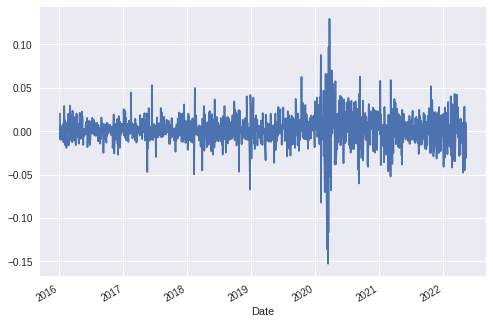

In [ ]:
retorno_carteira.plot()

Retorno acumulado

In [ ]:
returno_acumulado = (1 + retorno_carteira).cumprod()

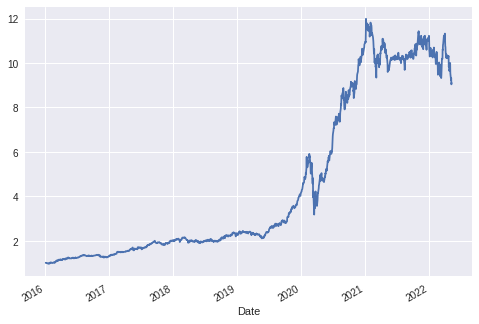

In [ ]:
returno_acumulado.plot()

In [ ]:
# Importando dados do IBOV para Benchmark

In [ ]:
ibov = yf.download('^BVSP', start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [ ]:
type(ibov)

pandas.core.series.Series

In [ ]:
ibov_retornos = ibov.pct_change()

In [ ]:
returno_acumulado_ibov = (1 + ibov_retornos).cumprod()

In [ ]:
returno_acumulado_ibov.head()

Date
2016-01-04         NaN
2016-01-05    1.006597
2016-01-06    0.991267
2016-01-07    0.965687
2016-01-08    0.963717
Name: Adj Close, dtype: float64

In [ ]:
returno_acumulado_ibov = pd.DataFrame(returno_acumulado_ibov)

In [ ]:
returno_acumulado_ibov.head()

,Adj Close
Date,
2016-01-04,NaN
2016-01-05,1.006597
2016-01-06,0.991267
2016-01-07,0.965687
2016-01-08,0.963717


In [ ]:
returno_acumulado_ibov.rename(columns = {'Adj Close': 'Ibov'}, inplace = True)

In [ ]:
returno_acumulado_ibov.head()

,Ibov
Date,
2016-01-04,NaN
2016-01-05,1.006597
2016-01-06,0.991267
2016-01-07,0.965687
2016-01-08,0.963717


In [ ]:
novo_df = pd.merge(pd.DataFrame(returno_acumulado), returno_acumulado_ibov, how = 'inner', on = 'Date')

In [ ]:
novo_df.head()

,0,Ibov
Date,,
2016-01-05,1.020195,1.006597
2016-01-06,1.014462,0.991267
2016-01-07,1.004433,0.965687
2016-01-08,1.010423,0.963717
2016-01-11,1.006895,0.948008


In [ ]:
novo_df.columns

Index([0, 'Ibov'], dtype='object')

In [ ]:
novo_df.rename(columns = {0:'Minha Carteira'}, inplace = True)

In [ ]:
novo_df.head()

,Minha Carteira,Ibov
Date,,
2016-01-05,1.020195,1.006597
2016-01-06,1.014462,0.991267
2016-01-07,1.004433,0.965687
2016-01-08,1.010423,0.963717
2016-01-11,1.006895,0.948008


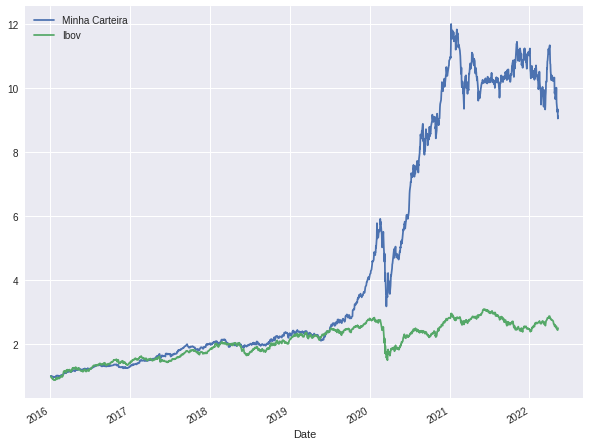

In [ ]:
novo_df.plot(figsize = (10,8));